In [1]:
import scipy.stats as stats
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import statsmodels.api as sm
from statsmodels.stats.sandwich_covariance import cov_hac
warnings.filterwarnings("ignore", category=DeprecationWarning)
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
upload = files.upload()

Saving for_allocation.csv to for_allocation.csv


In [3]:
upload = files.upload()

Saving returns.csv to returns.csv


In [5]:
signal_df = pd.read_csv('for_allocation.csv')
# Convert 'Date' column to datetime if it's not already
signal_df['Date'] = pd.to_datetime(signal_df['Date'])

# Set date to the first day of the month
signal_df['Date'] = signal_df['Date'].values.astype('datetime64[M]')
signal_df.drop(columns=['predicted signal'], inplace=True)
signal_df['Date'] = pd.to_datetime(signal_df['Date'])

signal_df

,Date,real signal
0,1990-01-01,0
1,1990-02-01,0
2,1990-03-01,0
3,1990-04-01,0
4,1990-05-01,0
...,...,...
417,2024-10-01,0
418,2024-11-01,0
419,2024-12-01,0
420,2025-01-01,0


In [6]:
returns_df=pd.read_csv('returns.csv')
returns_df['Date'] = pd.to_datetime(returns_df['Date'])
returns_df

,Date,MSCI EM,MSCI US,TB3MS,US Corporate High Yield,Intermediate Yield,Equity REIT,Mortgage REIT,GOLD,US long treasury,...,absolute_Bond_IY_ROR_Credit,Dual_Credit,relative_REIT,absolute_REIT_equity_ROR_REIT,absolute_REIT_mortgage_ROR_REIT,Dual_REIT,relative_Stress,absolute_Stress_gold_ROR_Stress,absolute_Stress_LT_ROR_Stress,Dual_Stress
0,1987-12-01,10000.000000,3.212254e+04,5.77,174.91,397.53,802.51,38.8313,484.10,339.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1988-01-01,10983.800000,3.346735e+04,5.81,180.76,409.20,846.49,42.0511,458.00,359.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1988-02-01,11021.100000,3.483704e+04,5.66,186.61,414.68,878.86,42.0154,426.15,363.68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1988-03-01,12204.600000,3.363959e+04,5.70,184.67,413.79,883.23,41.3837,456.95,352.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1988-04-01,12856.100000,3.391591e+04,5.91,186.08,413.19,889.37,41.2377,449.00,346.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,2024-09-01,308847.978765,1.326418e+06,4.72,2678.46,3171.57,27328.47,2.7300,2629.95,3435.34,...,0.012641,0.016181,0.030695,0.030695,0.003851,0.030695,0.044335,0.044335,0.003851,0.044335
442,2024-10-01,294867.524873,1.316301e+06,4.51,2663.98,3122.50,26341.96,2.5600,2734.15,3256.51,...,-0.015472,-0.005406,-0.037450,-0.037450,0.003683,-0.037450,0.038111,0.038111,-0.054915,0.038111
443,2024-11-01,283607.123441,1.398145e+06,4.42,2694.63,3148.31,27283.38,2.6500,2651.05,3315.62,...,0.008266,0.011505,0.034505,0.034505,0.033962,0.034505,-0.031346,-0.031346,0.017828,-0.031346
444,2024-12-01,284147.548253,1.362097e+06,4.27,2683.14,3125.31,25101.18,2.4800,2609.10,3139.22,...,-0.007306,-0.004264,-0.086936,-0.086936,0.003491,-0.086936,-0.016078,-0.016078,0.003491,-0.016078


In [7]:
merged_df = pd.merge(signal_df, returns_df, on='Date', how='inner')

In [8]:
merged_df

,Date,real signal,MSCI EM,MSCI US,TB3MS,US Corporate High Yield,Intermediate Yield,Equity REIT,Mortgage REIT,GOLD,...,absolute_Bond_IY_ROR_Credit,Dual_Credit,relative_REIT,absolute_REIT_equity_ROR_REIT,absolute_REIT_mortgage_ROR_REIT,Dual_REIT,relative_Stress,absolute_Stress_gold_ROR_Stress,absolute_Stress_LT_ROR_Stress,Dual_Stress
0,1990-01-01,0,23927.200000,4.472283e+04,7.64,194.21,481.40,950.14,27.0345,415.05,...,-0.006829,-0.006829,-0.043278,-0.043278,0.006154,-0.043278,-0.037370,0.006154,-0.037370,-0.037370
1,1990-02-01,0,24865.600000,4.534858e+04,7.74,190.20,482.93,943.47,24.4518,407.70,...,0.003178,0.003178,-0.007070,0.006232,0.006232,0.006232,-0.002928,0.006232,-0.002928,-0.002928
2,1990-03-01,0,21501.400000,4.638294e+04,7.90,195.19,483.77,952.88,23.4546,368.50,...,0.001739,0.001739,0.009875,0.006356,0.006356,0.006356,-0.004150,0.006356,-0.004150,-0.004150
3,1990-04-01,0,23052.500000,4.539908e+04,7.77,194.86,481.89,936.32,23.0878,367.75,...,-0.003886,-0.003886,-0.017686,0.006255,0.006255,0.006255,-0.024465,0.006255,-0.024465,-0.024465
4,1990-05-01,0,24946.000000,4.955703e+04,7.74,198.62,493.57,935.60,23.0647,363.05,...,0.024238,0.024238,-0.000770,0.006232,0.006232,0.006232,0.044301,0.006232,0.044301,0.044301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,2024-09-01,0,308847.978765,1.326418e+06,4.72,2678.46,3171.57,27328.47,2.7300,2629.95,...,0.012641,0.016181,0.030695,0.030695,0.003851,0.030695,0.044335,0.044335,0.003851,0.044335
417,2024-10-01,0,294867.524873,1.316301e+06,4.51,2663.98,3122.50,26341.96,2.5600,2734.15,...,-0.015472,-0.005406,-0.037450,-0.037450,0.003683,-0.037450,0.038111,0.038111,-0.054915,0.038111
418,2024-11-01,0,283607.123441,1.398145e+06,4.42,2694.63,3148.31,27283.38,2.6500,2651.05,...,0.008266,0.011505,0.034505,0.034505,0.033962,0.034505,-0.031346,-0.031346,0.017828,-0.031346
419,2024-12-01,0,284147.548253,1.362097e+06,4.27,2683.14,3125.31,25101.18,2.4800,2609.10,...,-0.007306,-0.004264,-0.086936,-0.086936,0.003491,-0.086936,-0.016078,-0.016078,0.003491,-0.016078


In [9]:
strategy_cols = [
    'Dual_Equity', 'Dual_Credit',
    'Dual_REIT','Dual_Stress'
]

# Prepare a dictionary to collect performance metrics
metrics = []

# Loop through each regime and each strategy column
for regime in [0, 1]:
    regime_df = merged_df[merged_df['real signal'] == regime]
    for col in strategy_cols:
        data = regime_df[col].dropna()
        if len(data) == 0:
            continue

        annualized_return = (1 + data.mean())**12 - 1
        annualized_vol = data.std() * (12 ** 0.5)
        sharpe_ratio = annualized_return / annualized_vol if annualized_vol != 0 else float('nan')
        win_rate = (data > 0).mean()
        cumulative = (1 + data).cumprod()
        max_drawdown = ((cumulative.cummax() - cumulative) / cumulative.cummax()).max()

        metrics.append({
            'Portfolio': col,
            'Regime': 'Low VIX' if regime == 0 else 'High VIX',
            'Annualized Return': annualized_return,
            'Annualized Volatility': annualized_vol,
            'Sharpe Ratio': sharpe_ratio,
            'Win Rate': win_rate,
            'Max Drawdown': -max_drawdown
        })
metrics_df = pd.DataFrame(metrics)
low_real_vix_df = metrics_df[metrics_df['Regime'] == 'Low VIX'].reset_index(drop=True)
high_real_vix_df = metrics_df[metrics_df['Regime'] == 'High VIX'].reset_index(drop=True)

In [10]:
def plot_metric_bar(df, metric, title):
    plt.figure(figsize=(10, 5))
    plt.bar(df['Portfolio'], df[metric])
    plt.xticks(rotation=45, ha='right')
    plt.ylabel(metric)
    plt.title(f'{title} - {metric}')
    plt.tight_layout()
    plt.show()

In [11]:
low_real_vix_df

,Portfolio,Regime,Annualized Return,Annualized Volatility,Sharpe Ratio,Win Rate,Max Drawdown
0,Dual_Equity,Low VIX,0.181978,0.152179,1.195812,0.722380,-0.211238
1,Dual_Credit,Low VIX,0.084618,0.040346,2.097290,0.798867,-0.061927
2,Dual_REIT,Low VIX,0.095585,0.134377,0.711316,0.733711,-0.319089
3,Dual_Stress,Low VIX,0.078650,0.112716,0.697776,0.694051,-0.213137


In [12]:
high_real_vix_df

,Portfolio,Regime,Annualized Return,Annualized Volatility,Sharpe Ratio,Win Rate,Max Drawdown
0,Dual_Equity,High VIX,-0.033596,0.173401,-0.193750,0.691176,-0.252642
1,Dual_Credit,High VIX,0.014309,0.065716,0.217747,0.735294,-0.164758
2,Dual_REIT,High VIX,-0.016766,0.163938,-0.102273,0.794118,-0.355417
3,Dual_Stress,High VIX,0.043148,0.136270,0.316639,0.647059,-0.164396


In [13]:
merged_df

,Date,real signal,MSCI EM,MSCI US,TB3MS,US Corporate High Yield,Intermediate Yield,Equity REIT,Mortgage REIT,GOLD,...,absolute_Bond_IY_ROR_Credit,Dual_Credit,relative_REIT,absolute_REIT_equity_ROR_REIT,absolute_REIT_mortgage_ROR_REIT,Dual_REIT,relative_Stress,absolute_Stress_gold_ROR_Stress,absolute_Stress_LT_ROR_Stress,Dual_Stress
0,1990-01-01,0,23927.200000,4.472283e+04,7.64,194.21,481.40,950.14,27.0345,415.05,...,-0.006829,-0.006829,-0.043278,-0.043278,0.006154,-0.043278,-0.037370,0.006154,-0.037370,-0.037370
1,1990-02-01,0,24865.600000,4.534858e+04,7.74,190.20,482.93,943.47,24.4518,407.70,...,0.003178,0.003178,-0.007070,0.006232,0.006232,0.006232,-0.002928,0.006232,-0.002928,-0.002928
2,1990-03-01,0,21501.400000,4.638294e+04,7.90,195.19,483.77,952.88,23.4546,368.50,...,0.001739,0.001739,0.009875,0.006356,0.006356,0.006356,-0.004150,0.006356,-0.004150,-0.004150
3,1990-04-01,0,23052.500000,4.539908e+04,7.77,194.86,481.89,936.32,23.0878,367.75,...,-0.003886,-0.003886,-0.017686,0.006255,0.006255,0.006255,-0.024465,0.006255,-0.024465,-0.024465
4,1990-05-01,0,24946.000000,4.955703e+04,7.74,198.62,493.57,935.60,23.0647,363.05,...,0.024238,0.024238,-0.000770,0.006232,0.006232,0.006232,0.044301,0.006232,0.044301,0.044301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,2024-09-01,0,308847.978765,1.326418e+06,4.72,2678.46,3171.57,27328.47,2.7300,2629.95,...,0.012641,0.016181,0.030695,0.030695,0.003851,0.030695,0.044335,0.044335,0.003851,0.044335
417,2024-10-01,0,294867.524873,1.316301e+06,4.51,2663.98,3122.50,26341.96,2.5600,2734.15,...,-0.015472,-0.005406,-0.037450,-0.037450,0.003683,-0.037450,0.038111,0.038111,-0.054915,0.038111
418,2024-11-01,0,283607.123441,1.398145e+06,4.42,2694.63,3148.31,27283.38,2.6500,2651.05,...,0.008266,0.011505,0.034505,0.034505,0.033962,0.034505,-0.031346,-0.031346,0.017828,-0.031346
419,2024-12-01,0,284147.548253,1.362097e+06,4.27,2683.14,3125.31,25101.18,2.4800,2609.10,...,-0.007306,-0.004264,-0.086936,-0.086936,0.003491,-0.086936,-0.016078,-0.016078,0.003491,-0.016078


In [14]:
(1 + merged_df[merged_df['real signal'] == 1].set_index('Date')['Dual_Equity'])

,Dual_Equity
Date,
1990-08-01,0.872420
1990-09-01,0.872306
1990-10-01,0.981434
1991-01-01,1.005041
1997-08-01,0.940410
...,...
2022-05-01,0.997294
2022-06-01,1.001233
2022-07-01,1.001840


In [15]:
# Convert to cumulative return for each strategy column by regime
cumulative_returns_low = (1 + merged_df[merged_df['real signal'] == 0]
                          .set_index('Date')[strategy_cols]).cumprod()
cumulative_returns_high = (1 + merged_df[merged_df['real signal'] == 1]
                           .set_index('Date')[strategy_cols]).cumprod()

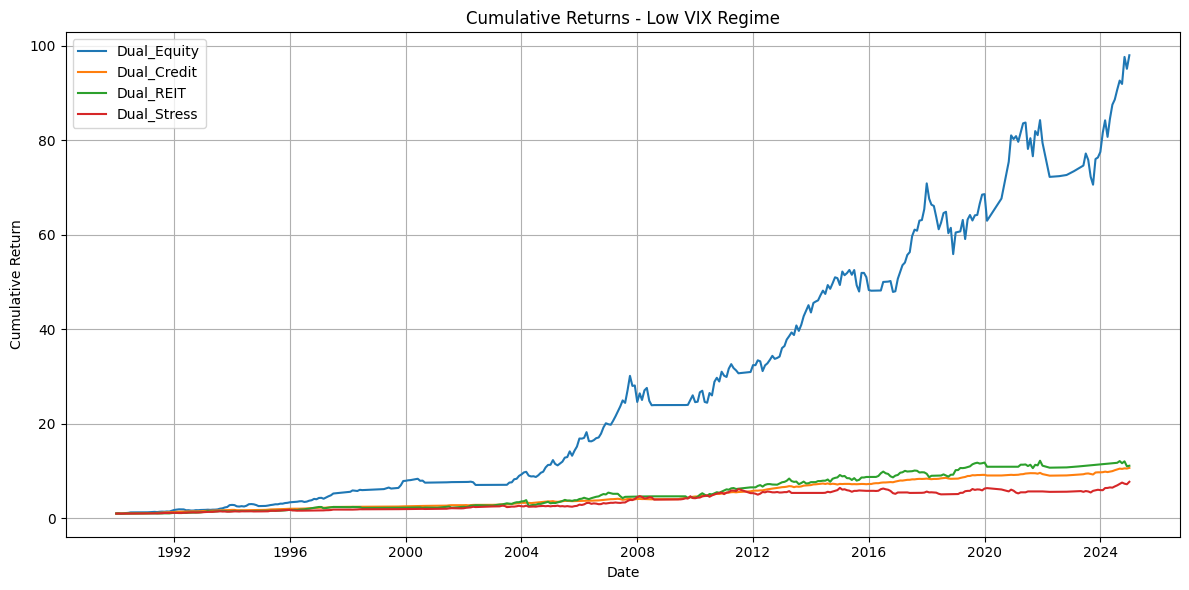

In [16]:
# Plot cumulative returns for Low VIX
plt.figure(figsize=(12, 6))
for col in strategy_cols:
    plt.plot(cumulative_returns_low.index, cumulative_returns_low[col], label=col)
plt.title('Cumulative Returns - Low VIX Regime')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

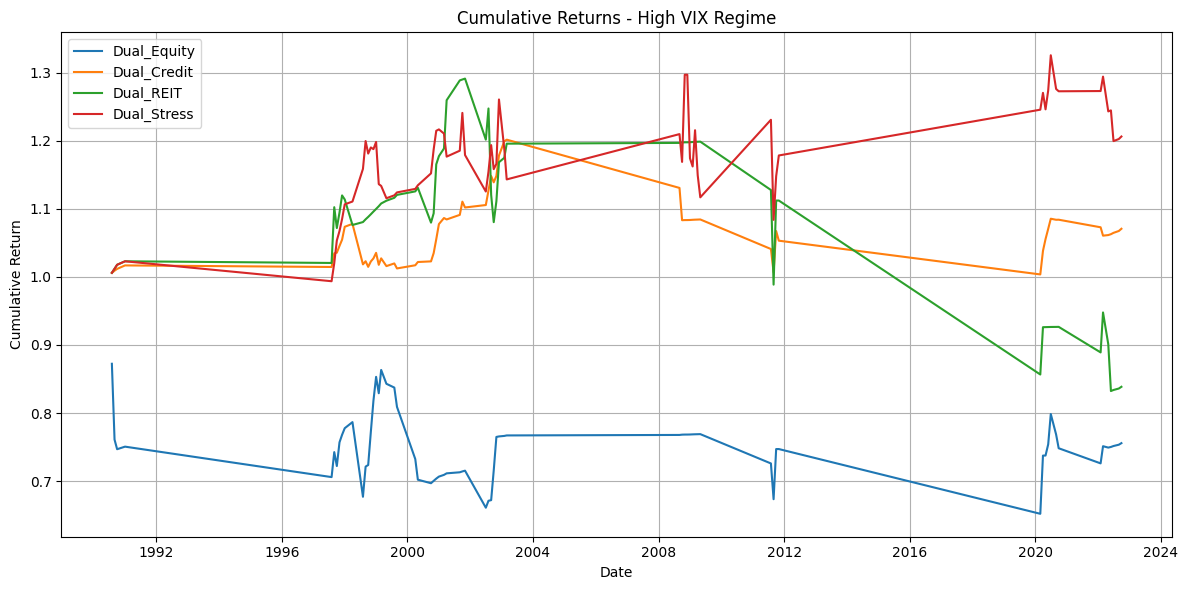

In [17]:
# Plot cumulative returns for High VIX
plt.figure(figsize=(12, 6))
for col in strategy_cols:
    plt.plot(cumulative_returns_high.index, cumulative_returns_high[col], label=col)
plt.title('Cumulative Returns - High VIX Regime')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()